# EDA + Evolución del lenguaje personajes EDA

Para determinar los personajes principales, como es lógico, hay que determinar la cantidad de palabras que usan los personajes en general, y de ahí al contar estimaré que los que más palabras han dicho, son los personajes principales.

## Librerías a utilizar:

### Generales

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Carga Datos

In [32]:
df_ep = pd.read_csv('The Saimpsons Archive/OG/simpsons_episodes.csv')
df_ep.sample()

,id,image_url,imdb_rating,imdb_votes,number_in_season,number_in_series,original_air_date,original_air_year,production_code,season,title,us_viewers_in_millions,video_url,views
206,543,http://static-media.fxx.com/img/FX_Networks_-_...,6.7,468.0,13,543,2014-03-09,2014,SABF07,25,The Man Who Grew Too Much,3.75,http://www.simpsonsworld.com/video/307207235909,44512.0


In [33]:
df_ep.dtypes

id                          int64
image_url                  object
imdb_rating               float64
imdb_votes                float64
number_in_season            int64
number_in_series            int64
original_air_date          object
original_air_year           int64
production_code            object
season                      int64
title                      object
us_viewers_in_millions    float64
video_url                  object
views                     float64
dtype: object

In [34]:
df_char = pd.read_csv('The Saimpsons Archive/OG/simpsons_characters.csv')
df_char.sample()

,id,name,normalized_name,gender
1146,1174,Admissions Woman,admissions woman,NaN


In [35]:
df_script = pd.read_csv('The Saimpsons Archive/OG/simpsons_script_lines.csv', skiprows=[142025])
df_script.sample()

,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count
26766,36481,126,289,"Moe Szyslak: Well, that does it. That does it!...",1289000,True,17.0,5.0,Moe Szyslak,Simpson Home,"Well, that does it. That does it! I'm lookin' ...",well that does it that does it im lookin at hi...,12


In [36]:
df_script.dtypes

id                      int64
episode_id              int64
number                  int64
raw_text               object
timestamp_in_ms         int64
speaking_line            bool
character_id          float64
location_id           float64
raw_character_text     object
raw_location_text      object
spoken_words           object
normalized_text        object
word_count             object
dtype: object

## Limpieza

### df_ep

In [37]:
df_ep.shape, df_ep.isna().sum()

((600, 14),
 id                        0
 image_url                 4
 imdb_rating               3
 imdb_votes                3
 number_in_season          0
 number_in_series          0
 original_air_date         0
 original_air_year         0
 production_code           0
 season                    0
 title                     0
 us_viewers_in_millions    6
 video_url                 4
 views                     4
 dtype: int64)

Dado que las url de las imágenes y vídeos no funcionan y/o no creo necesitarlas, se dropea la columna.

In [38]:
df_ep.drop(['image_url', 'video_url'], axis=1, inplace=True)
df_ep.shape

(600, 12)

Las demás columnas, como son necesarias, y son pocos NaN, se rellenarán con la mediana de la temporada a la que el capítulo pertenezca.

In [39]:
columns_to_fill = ['imdb_rating', 'imdb_votes', 'us_viewers_in_millions', 'views']  # Replace with the column name you want to fill NaN values for

for column_to_fill in columns_to_fill:
    median_by_group = df_ep.groupby('season')[column_to_fill].transform('median')
    df_ep[column_to_fill] = df_ep[column_to_fill].fillna(median_by_group)

df_ep.isna().sum()

id                        0
imdb_rating               0
imdb_votes                0
number_in_season          0
number_in_series          0
original_air_date         0
original_air_year         0
production_code           0
season                    0
title                     0
us_viewers_in_millions    0
views                     0
dtype: int64

In [40]:
df_ep.dtypes

id                          int64
imdb_rating               float64
imdb_votes                float64
number_in_season            int64
number_in_series            int64
original_air_date          object
original_air_year           int64
production_code            object
season                      int64
title                      object
us_viewers_in_millions    float64
views                     float64
dtype: object

### df_char

In [41]:
df_char.shape, df_char.isna().sum()

((6722, 4),
 id                    0
 name                  0
 normalized_name       0
 gender             6399
 dtype: int64)

In [42]:
df_char.dtypes

id                  int64
name               object
normalized_name    object
gender             object
dtype: object

### df_script

In [43]:
df_script.shape, df_script.isna().sum()

((158270, 13),
 id                        0
 episode_id                0
 number                    0
 raw_text                  0
 timestamp_in_ms           0
 speaking_line             0
 character_id          17521
 location_id             407
 raw_character_text    17521
 raw_location_text       407
 spoken_words          26158
 normalized_text       26183
 word_count            26158
 dtype: int64)

In [44]:
df_script[df_script['speaking_line']==False].count().iloc[0]

26158

Esto nos confirma que hay tantos espacios vacíos en spoken_words como false en speaking_line, lo cual tiene todo el sentido del mundo.

Por otro lado, las filas que no tienen ni personajes ni lugares, pues no tienen ese valor. Lo que hace muy complicado cambiar el tipo a int, cuando es necesario, así que no se hará, de momento no parece necesario.

## EDA

### ¿Cuántas temporadas tiene?

In [45]:
df_ep[df_ep['season']==max(df_ep['season'])][['original_air_year','season']].iloc[0]

original_air_year    2016
season                 28
Name: 234, dtype: int64

In [46]:
df_ep.shape

(600, 12)

In [47]:
ultimo = df_ep[df_ep['original_air_year']==max(df_ep['original_air_year'])]['original_air_year'].iloc[0]
primero = df_ep[df_ep['original_air_year']==min(df_ep['original_air_year'])]['original_air_year'].iloc[0]
print(f'El primer capítulo fue emitido en {primero}\nEl último capítulo que hay en el dataset fue emitido en {ultimo}\nLo que nos dice que tenemos capítulos de Los Simpson producidos a lo largo de {ultimo-primero} años')

El primer capítulo fue emitido en 1989
El último capítulo que hay en el dataset fue emitido en 2016
Lo que nos dice que tenemos capítulos de Los Simpson producidos a lo largo de 27 años


**Lo que implica que tenemos 28 temporadas de los simpson, con 600 episodios, producidos a lo largo de 27 años**

### ¿Cuáles son los personajes que son más principales?

In [48]:
df_script.columns

Index(['id', 'episode_id', 'number', 'raw_text', 'timestamp_in_ms',
       'speaking_line', 'character_id', 'location_id', 'raw_character_text',
       'raw_location_text', 'spoken_words', 'normalized_text', 'word_count'],
      dtype='object')

In [49]:
df_forchar2 = df_script[df_script['speaking_line']==True][['character_id', 'raw_character_text', 'spoken_words']]
df_forchar2['character_id'] = pd.to_numeric(df_forchar2['character_id'], errors='coerce').astype('Int64')

df_forchar2.shape, df_forchar2.dtypes, df_forchar2.isna().sum()

((132112, 3),
 character_id           Int64
 raw_character_text    object
 spoken_words          object
 dtype: object,
 character_id          2
 raw_character_text    2
 spoken_words          0
 dtype: int64)

In [50]:
df_forchar2=df_forchar2.dropna()
def count_words(text):
    return len(text.split())

df_forchar2['word_count'] = df_forchar2['spoken_words'].apply(lambda x: count_words(x))
df_forchar2.sample(3)

,character_id,raw_character_text,spoken_words,word_count
108507,2,Homer Simpson,Hmm... that sounds like Tress MacNeille.,6
126671,9,Lisa Simpson,"Yeah, so he could shoot it himself. Franklin R...",19
55495,2,Homer Simpson,"Well, I hope you cut me better than you did th...",25


In [51]:
char2 = df_forchar2.groupby('character_id')['word_count'].sum()
char2 = char2.reset_index()

char2.columns = ['id', 'sum_words_said']

char2

,id,sum_words_said
0,1,125897
1,2,274656
2,3,28185
3,4,335
4,5,1033
...,...,...
6233,6743,26
6234,6744,68
6235,6746,18
6236,6747,25


In [52]:
char2.columns, char2.dtypes

(Index(['id', 'sum_words_said'], dtype='object'),
 id                Int64
 sum_words_said    int64
 dtype: object)

In [53]:
df_char2 = pd.merge(df_char, char2, on='id')
df_char2

,id,name,normalized_name,gender,sum_words_said
0,7,Children,children,NaN,65
1,12,Mechanical Santa,mechanical santa,NaN,37
2,13,Tattoo Man,tattoo man,NaN,11
3,16,DOCTOR ZITSOFSKY,doctor zitsofsky,NaN,50
4,20,Students,students,NaN,33
...,...,...,...,...,...
6233,5222,Ron Rabinowitz,ron rabinowitz,m,252
6234,5728,Martha Stewart,martha stewart,f,251
6235,1770,Officer Goodman,officer goodman,m,249
6236,1634,Evan Conover,evan conover,m,234


In [54]:
df_char2.dtypes

id                  int64
name               object
normalized_name    object
gender             object
sum_words_said      int64
dtype: object

In [55]:
df_char2['Char_Words_%'] = 100*df_char2['sum_words_said']/(df_char2['sum_words_said'].sum())
df_char2

,id,name,normalized_name,gender,sum_words_said,Char_Words_%
0,7,Children,children,NaN,65,0.004956
1,12,Mechanical Santa,mechanical santa,NaN,37,0.002821
2,13,Tattoo Man,tattoo man,NaN,11,0.000839
3,16,DOCTOR ZITSOFSKY,doctor zitsofsky,NaN,50,0.003812
4,20,Students,students,NaN,33,0.002516
...,...,...,...,...,...,...
6233,5222,Ron Rabinowitz,ron rabinowitz,m,252,0.019214
6234,5728,Martha Stewart,martha stewart,f,251,0.019137
6235,1770,Officer Goodman,officer goodman,m,249,0.018985
6236,1634,Evan Conover,evan conover,m,234,0.017841


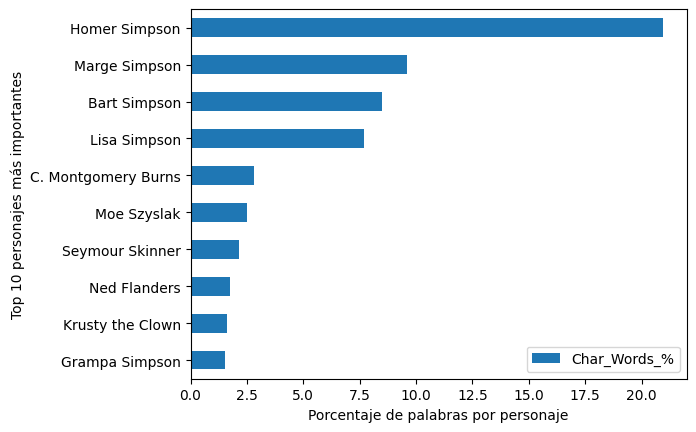

In [56]:
to_plot = df_char2.sort_values('sum_words_said', ascending=False).head(10)
to_plot.sort_values('sum_words_said', ascending=True).plot(kind='barh', x='name', y='Char_Words_%', color='tab:blue')
plt.ylabel('Top 10 personajes más importantes')
plt.xlabel('Porcentaje de palabras por personaje')
plt.show()

**De esto sacamos que Homer acapara más del 20% de todas las palabras dichas en Los Simpson, y que el resto de la familia (a excepción de Maggie) está en torno al 10%. Sería interesante ver cómo evoluciona esto a lo largo de las temporadas, pero por ahora no lo voy a hacer.**

## Guardado de CSVs nuevos
Como ya hemos sacado la info que necesitaba para 

In [57]:
df_ep.dtypes, df_ep.shape

(id                          int64
 imdb_rating               float64
 imdb_votes                float64
 number_in_season            int64
 number_in_series            int64
 original_air_date          object
 original_air_year           int64
 production_code            object
 season                      int64
 title                      object
 us_viewers_in_millions    float64
 views                     float64
 dtype: object,
 (600, 12))

In [58]:
df_ep['original_air_date'] = pd.to_datetime(df_ep['original_air_date'], errors='coerce')
df_ep.dtypes, df_ep.shape

(id                                 int64
 imdb_rating                      float64
 imdb_votes                       float64
 number_in_season                   int64
 number_in_series                   int64
 original_air_date         datetime64[ns]
 original_air_year                  int64
 production_code                   object
 season                             int64
 title                             object
 us_viewers_in_millions           float64
 views                            float64
 dtype: object,
 (600, 12))

In [59]:
# df_ep.to_csv('The Saimpsons Archive/in_use/simpsons_episodes.csv', index=False)

In [60]:
df_char.dtypes

id                  int64
name               object
normalized_name    object
gender             object
dtype: object

In [61]:
# df_char.to_csv('The Saimpsons Archive/in_use/simpsons_characters.csv', index=False)

In [62]:
df_script.isna().sum(), df_script.dtypes

(id                        0
 episode_id                0
 number                    0
 raw_text                  0
 timestamp_in_ms           0
 speaking_line             0
 character_id          17521
 location_id             407
 raw_character_text    17521
 raw_location_text       407
 spoken_words          26158
 normalized_text       26183
 word_count            26158
 dtype: int64,
 id                      int64
 episode_id              int64
 number                  int64
 raw_text               object
 timestamp_in_ms         int64
 speaking_line            bool
 character_id          float64
 location_id           float64
 raw_character_text     object
 raw_location_text      object
 spoken_words           object
 normalized_text        object
 word_count             object
 dtype: object)

para este caso necesito cambiar el word_count a int, dado que tiene NaNs y por eso no deja cambiar a int o a numérico, se van a insertar como 0, todos los NaNs, ya que el numero de NaNs coincide con el número de filas en las que speaking_line == False, es decir, no hay palabras dichas que contar.

In [63]:
df_script['word_count'] = df_script['word_count'].fillna(0)
df_script['word_count'].isna().sum(), df_script.shape

(0, (158270, 13))

In [64]:
df_script['word_count'] = pd.to_numeric(df_script['word_count'], errors='coerce')
df_script.dtypes, df_script.shape

(id                      int64
 episode_id              int64
 number                  int64
 raw_text               object
 timestamp_in_ms         int64
 speaking_line            bool
 character_id          float64
 location_id           float64
 raw_character_text     object
 raw_location_text      object
 spoken_words           object
 normalized_text        object
 word_count            float64
 dtype: object,
 (158270, 13))

In [65]:
# df_script.to_csv('The Saimpsons Archive/in_use/simpsons_script_lines.csv', index=False)

In [66]:
df_script[df_script['raw_character_text']== 'Homer Simpson'][['raw_character_text','character_id']].iloc[0]

raw_character_text    Homer Simpson
character_id                    2.0
Name: 57, dtype: object